# Bootstrap


![Bootstrap](https://raw.githubusercontent.com/SchattenGenie/pic-storage/master/bootstrap.png)





<font color='red'>Комментарий: простые задачки для разогрева(и повторения):</font>

##### Предположим, что мы бутстрепом отобрали N событий из выборки состоящей из N наблюдений. 
  1. Какая вероятность что первый элемент бутстрепной выборки не k элемент оригинальной выборки?
  2. Какая вероятность что k элемент оригинальной выборки не входит в бутстрепную выборку?



__1.__ 
  
  $$1 - \frac{1}{N}$$
  
  
__2.__
  
  $$\left(1 - \frac{1}{N}\right)^N \sim 0.63$$
  
  
##### Обоснование использование техники ресемплирования. Эффективность и состоятельность оценки плотности вероятности функцией $\hat{F}(x) = \frac{1}{N} \sum\limits_i I[x > x_i]$.

$$E\left[ \hat{F}(x) \right] = F(x)$$


$$Var \left[ \hat{F}(x) \right] = \frac{F(x)(F(x) - 1)}{n}$$


##### Сходимость бутстрепной оценки дисперсии к аналитической на примере среднего:

$$se_{boot} = \frac{1}{B} \sum\limits_b (\hat{\mu}^*_b - \hat{\mu})^2 \rightarrow \frac{1}{N} \sum \frac{(x_i - \hat{\mu})^2}{n}$$

Доказать используя закон больших чисел.

## Пример построение CDF с помощью бутстрепа для треугольного распределения

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# CDF треугольного распределения с a = 0, b = 1, c = 2
def TrueTriangularDistrubition(x):
    if x < 0:
        return 0
    elif x < 1:
        return x**2 / 2
    elif x < 2:
        return 2*x - x**2 / 2 - 1
    else:
        return 1

In [3]:
# размер изначальной выборки
N = 300
# размер бутстрепной выборки
B = 800

X = np.random.uniform(0, 1, size=N) + np.random.uniform(0, 1, size=N)
Xb = np.random.choice(X, (B, N), replace=True)
Xb.shape

(800, 300)

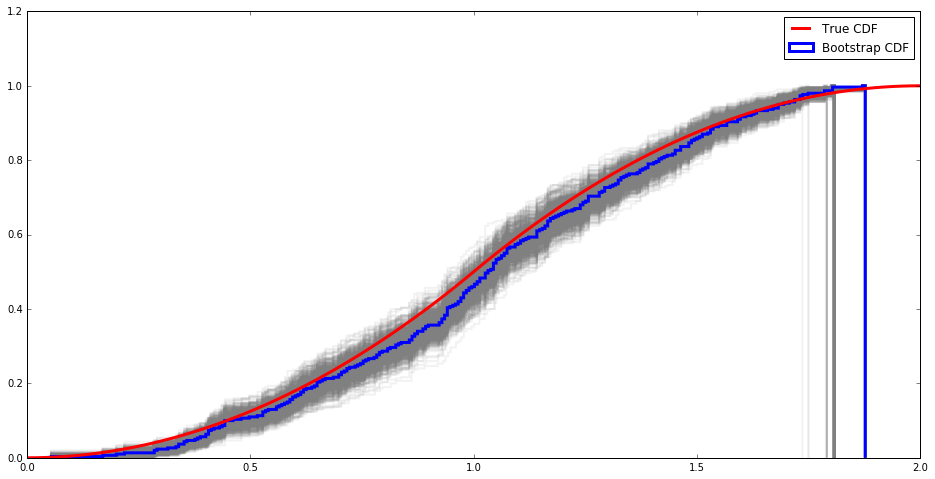

In [4]:
plt.figure(figsize = (16, 8))

# CDF для каждого бутстрепной выборки
for bootstrap_sample in Xb:
    plt.hist(bootstrap_sample, bins=N, normed=1, histtype='step',
             cumulative=True, alpha = 0.1, color='grey', linewidth = 2)

# Истинное CDF
plt.plot(np.linspace(0, 2, 100), 
         list(map(TrueTriangularDistrubition, np.linspace(0, 2, 100))), 
         color = 'red', linewidth = 3, label='True CDF')    

# 
plt.hist(X, bins=N, normed=1, histtype='step',
         cumulative=True, label='Bootstrap CDF', color='blue', linewidth = 3)

plt.legend()
plt.show()

## Сравнение t-bootstrap и обычного бутстрепа

#### t-bootstrap интервалы



In [5]:
from scipy.stats import cauchy
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import expon
def mean(X):
    return np.mean(X, axis=1)

def mean_t(X, X_original):
    return (np.mean(X, axis=1) - np.mean(X_original)) / np.std(X, axis=1)

def percentile_confidence_interval(X, q=5):
    return np.percentile(X, q=q / 2), np.percentile(X, q=100 - q / 2)

In [6]:
def plot_statistics(distr, limits_1, limits_2, limits_3, mean_val):
    X = distr.rvs(size=N)
    boots = np.random.choice(X, (B, N), replace=True)
    mean_boots = mean(boots)
    mean_boots_t = mean_t(boots, X)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    
    axes[0].hist(X, bins=100, normed=True, range=limits_1);
    axes[0].axvline(x=mean_val, linewidth=4, color='r')
    axes[0].set_xlim(limits_1)
    
    axes[1].hist(mean_boots, bins=100, normed=True, range=limits_2);
    axes[1].axvline(x=mean_val, linewidth=4, color='r')
    lower_interval, higher_interval = percentile_confidence_interval(mean_boots)
    axes[1].axvline(x=lower_interval, linewidth=1, color='r', linestyle='--')
    axes[1].axvline(x=higher_interval, linewidth=1, color='r', linestyle='--')
    lower_interval, higher_interval = percentile_confidence_interval(mean_boots_t)
    print(lower_interval, higher_interval)
    axes[1].axvline(x=X.mean() - X.std() * lower_interval, linewidth=1, color='g', linestyle='-')
    axes[1].axvline(x=X.mean() - X.std() * higher_interval, linewidth=1, color='g', linestyle='-')
    axes[1].set_xlim(limits_2)
    
    axes[2].hist(mean_boots_t, bins=100, normed=True, range=limits_3);
    axes[2].axvline(x=0, linewidth=4, color='r')
    lower_interval, higher_interval = percentile_confidence_interval(mean_boots_t)
    axes[2].axvline(x=lower_interval, linewidth=1, color='r', linestyle='--')
    axes[2].axvline(x=higher_interval, linewidth=1, color='r', linestyle='--')
    axes[2].set_xlim(limits_3)

In [7]:
N = 50
B = 5000

-0.24487545843886224 0.3621551647268524
-0.21206371184018885 0.7656038753712745
-0.1820884042890894 1.8058680388897534
-0.24601444665504826 0.3298189355486328
-1.1964432031603192 0.19137825566347064


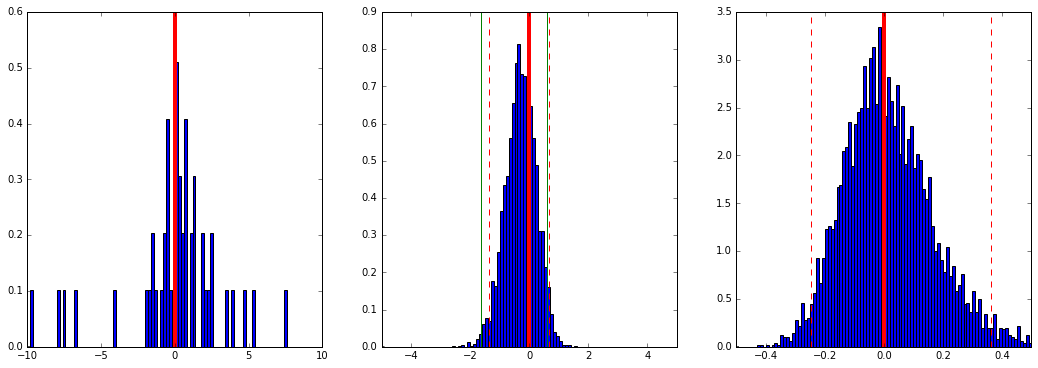

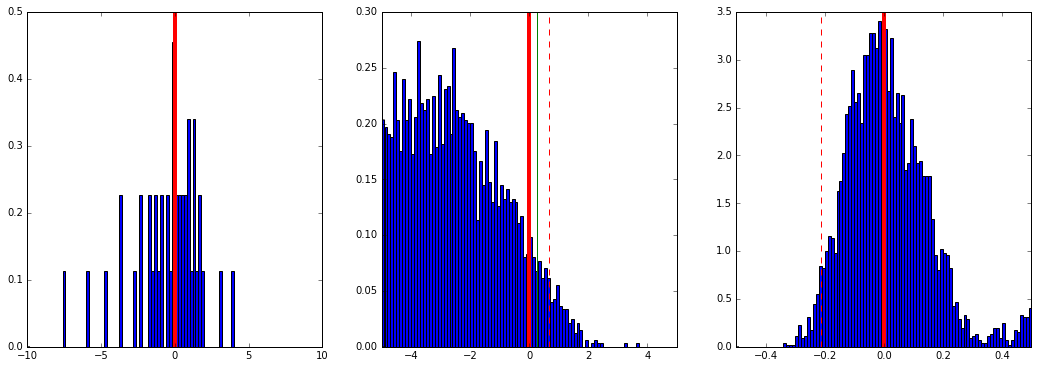

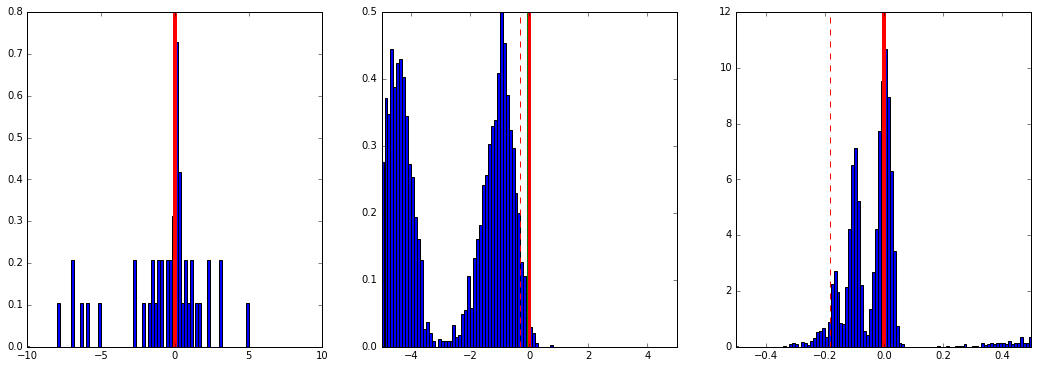

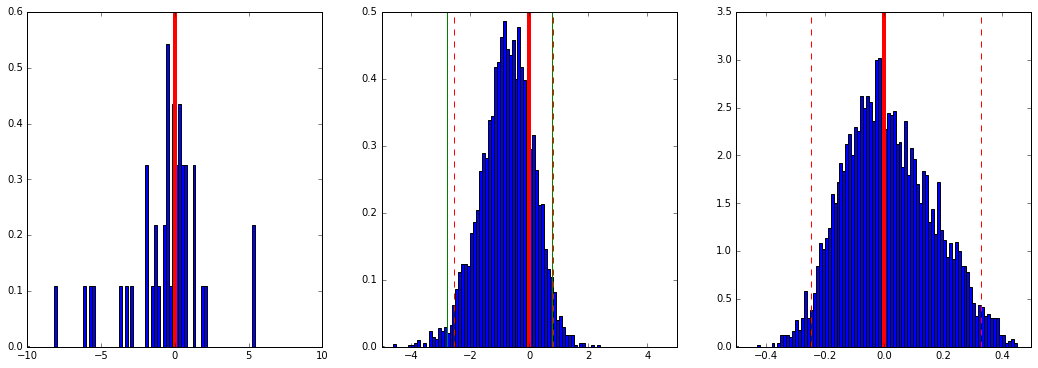

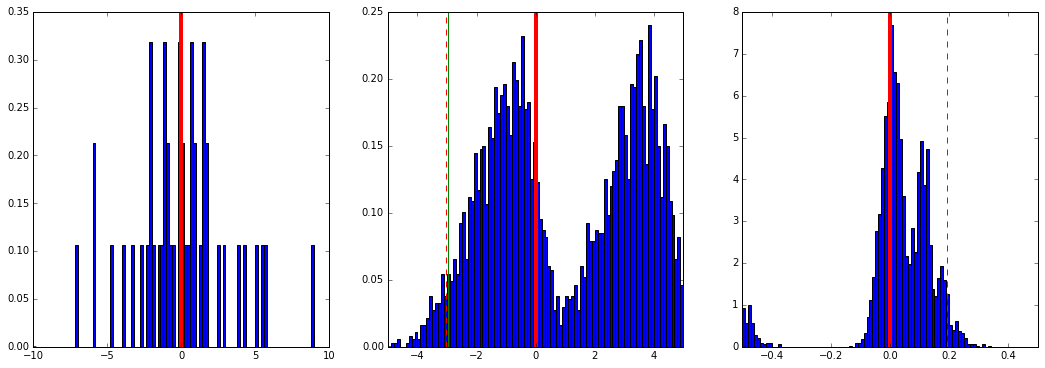

In [8]:
for i in range(5):
    plot_statistics(cauchy(), [-10, 10], [-5, 5], [-0.5, 0.5], 0)

-0.2984910483256171 0.2803540854935946
-0.27694644583750966 0.2930776379949943
-0.2864461654109949 0.2698312485608903
-0.2658534976109168 0.3116969121476457
-0.2947058307798042 0.27082597247079243


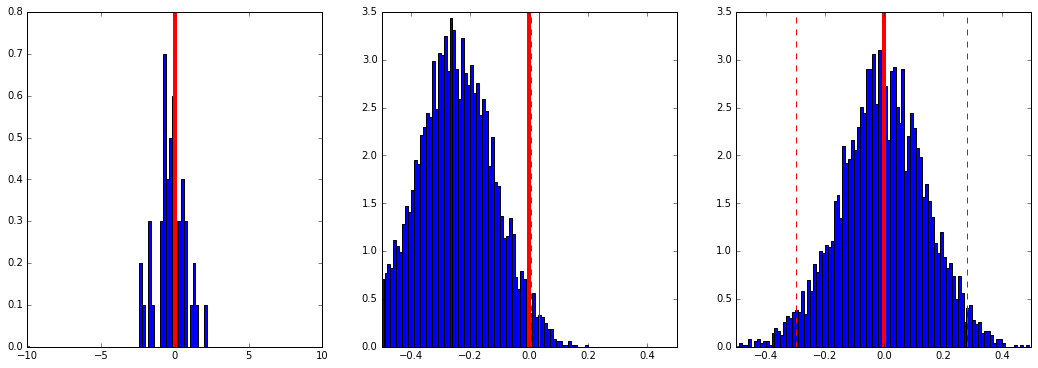

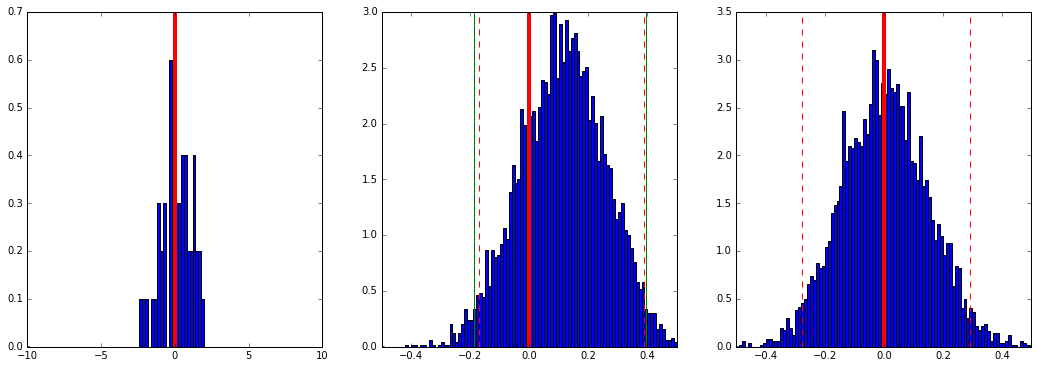

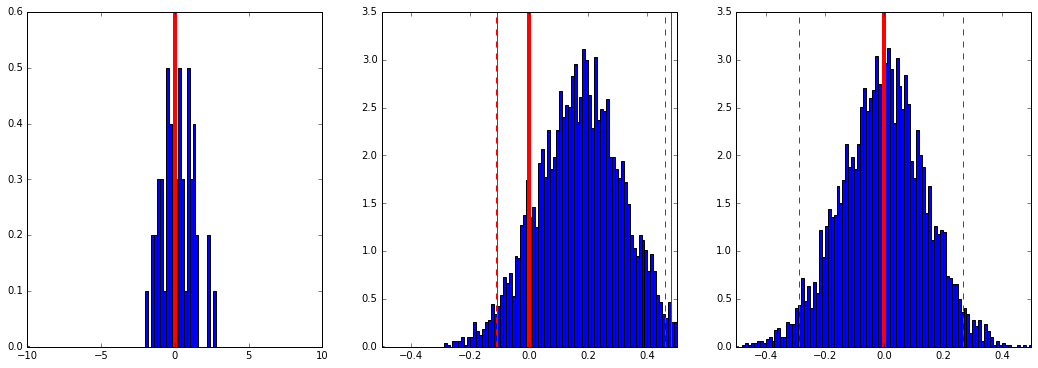

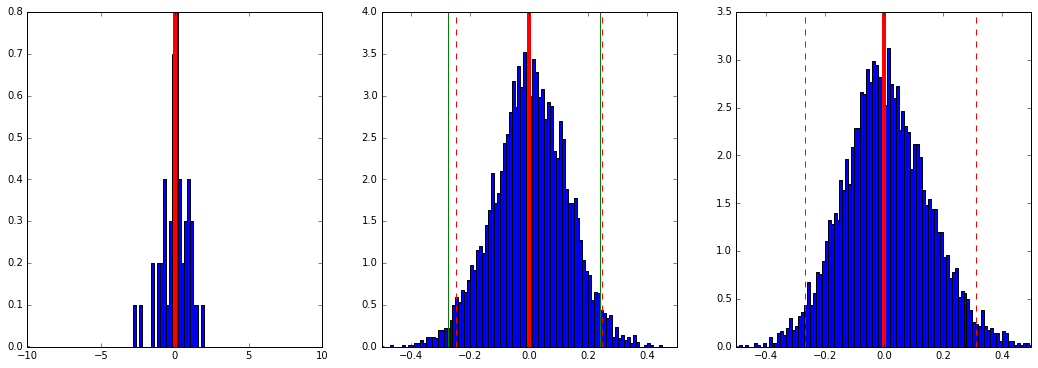

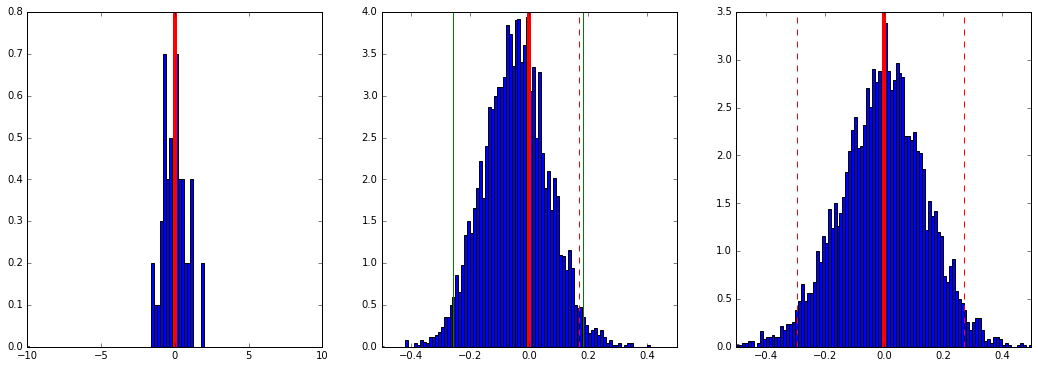

In [9]:
for i in range(5):
    plot_statistics(norm(), [-10, 10], [-0.5, 0.5], [-0.5, 0.5], 0)

In [10]:
#for i in range(5):
#    plot_statistics(t(3), [-10, 10], [-3, 3], [-1, 1], 0)

-0.3369084805197018 0.2529125263459571
-0.33156293749993254 0.25637174873297675
-0.36835905566988586 0.23919848709572872
-0.3359807090970258 0.2585229265095006
-0.33704811218279185 0.25193053408793287


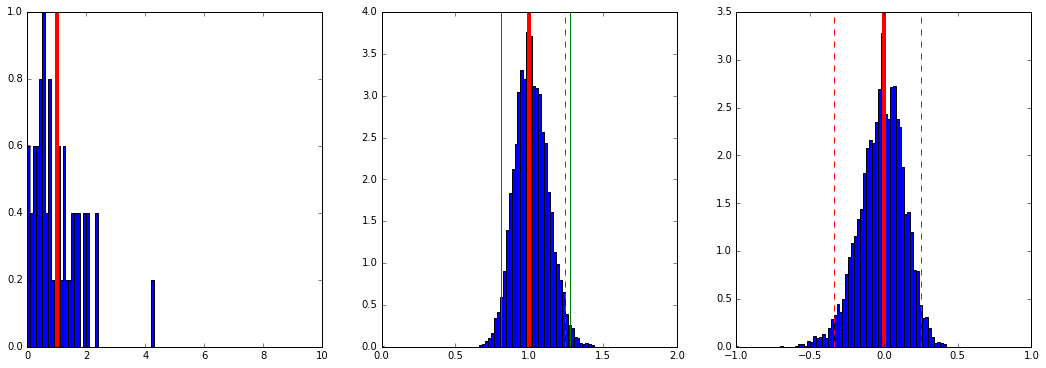

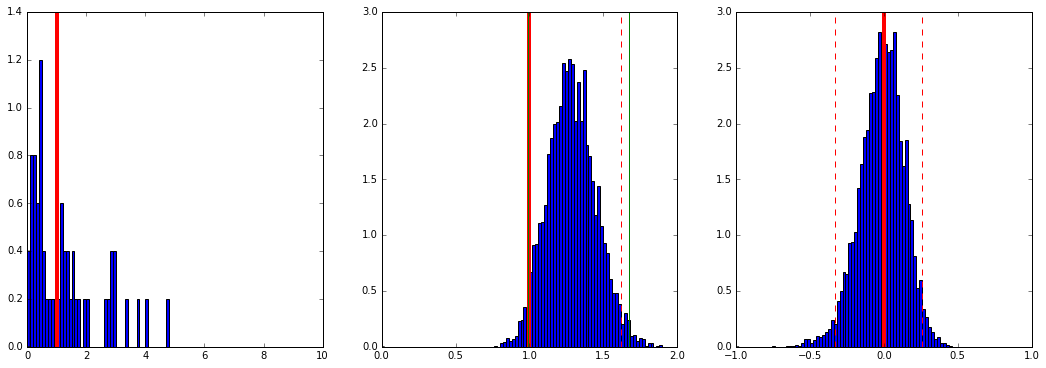

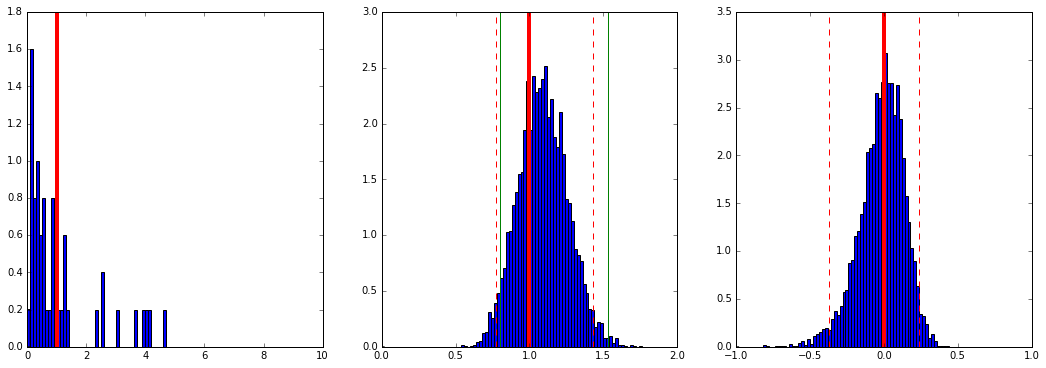

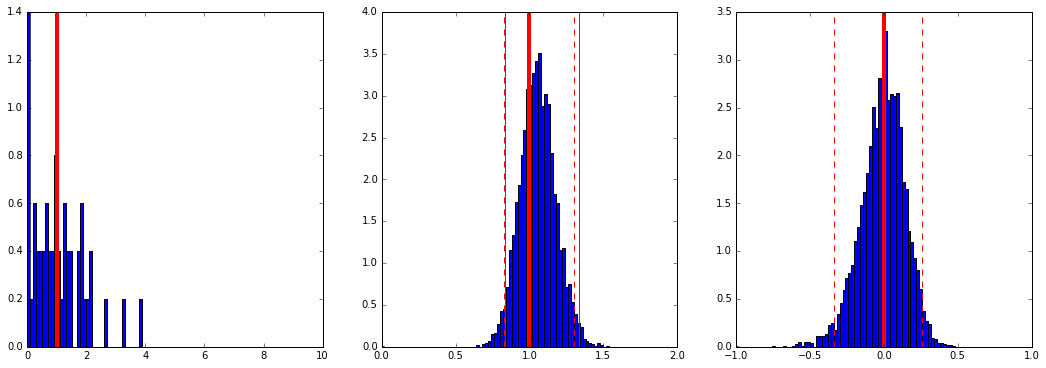

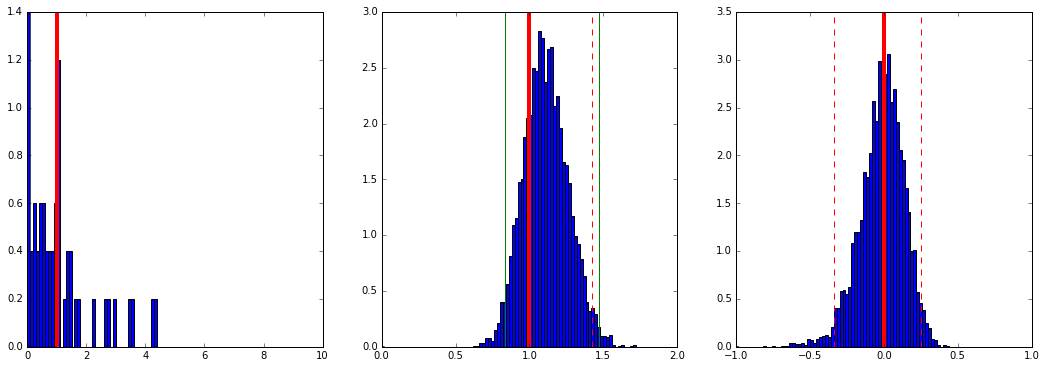

In [11]:
for i in range(5):
    plot_statistics(expon(), [0, 10], [1. - 1, 1. + 1], [-1, 1], 1)

## Вывод

В целом, перцентильный интервал выглядит самым простым вариантом оценивания, однако в реальности он даёт весьма плохие результаты так как __сильно__ зависит от того насколько хорошо изначальная выборка аппроксимирует истинное распределение случайной величины. Часто можно встретить советы что лучше __не используйте__ перцентильный бутстрап для оценки доверительных интервалов, однако, конечно, самое правильное решение это тестировать все доступные методы и выбирать экспериментально.

У t-bootstrap есть одно интересное свойство, к примеру,: как можно было заметить на последнем примере с экспоненциальным распределением, интервалы t-bootstrap смещены влево. t-bootstrap "уважает" ассиметрию распределений при расчёте доверительных интервалов.

## Интегрирование с помощью бутстрепа

Интегрирование функции $$f(x) = x \cos (71 x) + \frac{\sin (13 x^2)}{x}$$ на интервале $(0, 1)$.

/home/acapello/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


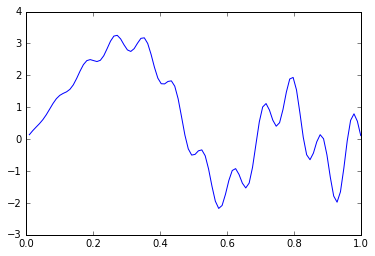

In [12]:
def f(x):
    return x * np.cos(71 * x) + np.sin(13 * x**2) / x

x = np.linspace(0, 1, 100)

plt.plot(x, f(x))

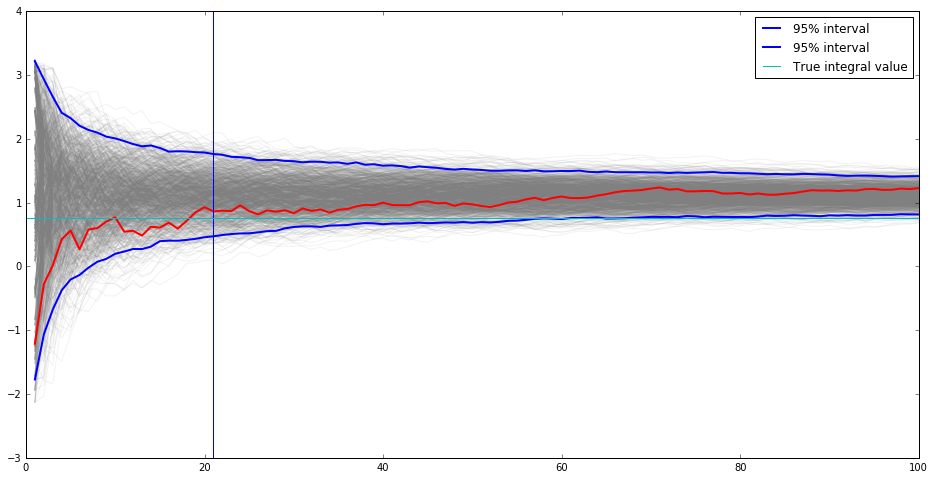

In [13]:
# data sample for integration
n = 100
x = f(np.random.random(n))

# bootstrap MC integration
reps = 1000
xb = np.random.choice(x, (n, reps), replace=True)
yb = 1 / np.arange(1, n+1)[:, None] * np.cumsum(xb, axis=0)
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)


plt.figure(figsize = (16, 8))
plt.plot(np.arange(1, n+1)[:, None], yb, c='grey', alpha=0.1)
plt.plot(np.arange(1, n+1), yb[:, 0], c='red', linewidth=2)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b', linewidth=2, label='95% interval');
plt.axvline(21, 0, 1)
plt.axvline(100, 0, 1)
plt.axhline(0.762816332183, c='c', label='True integral value')
plt.legend()
plt.show()

In [14]:
yb.shape

(100, 1000)

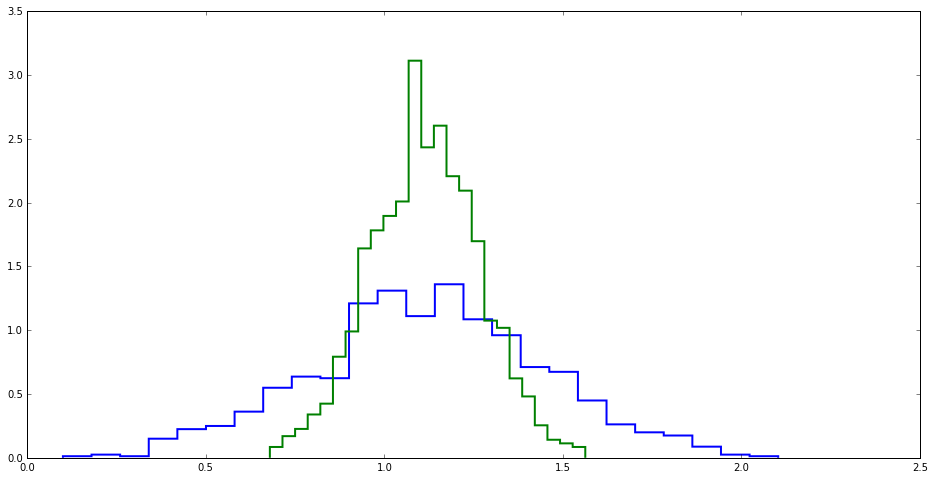

In [15]:
plt.figure(figsize = (16, 8))
plt.hist(yb[20, :], 25, histtype='step', normed=True, linewidth=2)
plt.hist(yb[99, :], 25, histtype='step', normed=True, linewidth=2)
plt.show()

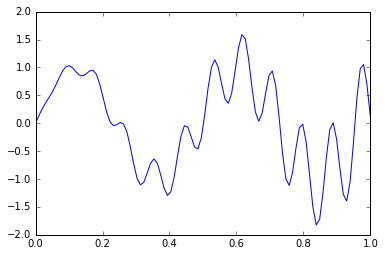

In [16]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)
x = np.linspace(0, 1, 100)

plt.plot(x, f(x))

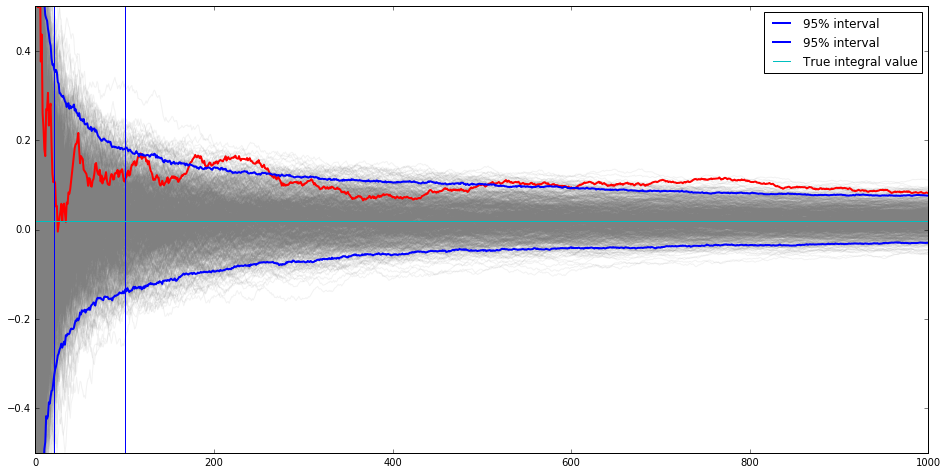

In [17]:

# data sample for integration
n = 1000
x = f(np.random.random(n))

# bootstrap MC integration
reps = 1000
xb = np.random.choice(x, (n, reps), replace=True)
yb = 1/np.arange(1, n+1)[:, None] * np.cumsum(xb, axis=0)
upper, lower = np.percentile(yb, [2.5, 97.5], axis=1)


plt.figure(figsize = (16, 8))
plt.plot(np.arange(1, n+1)[:, None], yb, c='grey', alpha=0.1)
plt.plot(np.arange(1, n+1), yb[:, 0], c='red', linewidth=2)
plt.plot(np.arange(1, n+1), upper, 'b', np.arange(1, n+1), lower, 'b', linewidth=2, label='95% interval');
plt.axvline(21, 0, 1)
plt.axvline(100, 0, 1)
plt.axhline(0.02025, c='c', label='True integral value')
plt.legend()
plt.ylim(-0.5, 0.5)
plt.show()

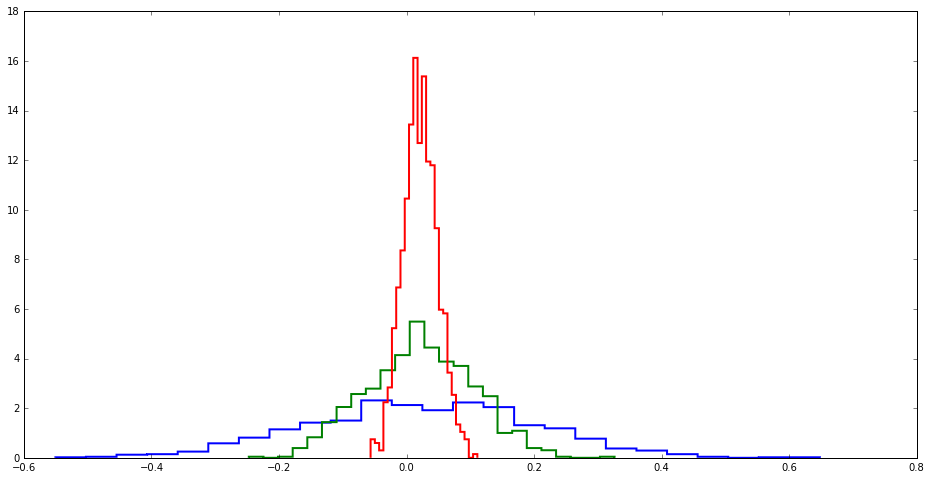

In [18]:
plt.figure(figsize = (16, 8))
plt.hist(yb[20, :], 25, histtype='step', normed=True, linewidth=2)
plt.hist(yb[99, :], 25, histtype='step', normed=True, linewidth=2)
plt.hist(yb[999, :], 25, histtype='step', normed=True, linewidth=2)
plt.show()

## Bootstrap bias estimatiom для двух проблем


$$B \sim \frac{e^N}{\sqrt{N}}$$

Посмотрим как можно оценивать смещение оценки с помощью бутстрепа и jacknife на трёх примерах:

<font color='red'>Комментарий: если останется время, то MLE оценки можно вывести</font>

  * $x_i \sim Exp(1)$, $\theta = \sigma^2$, $\hat{\theta} = \frac{1}{N} \sum (x_i - \bar{x})^2$ -- смещённая оценка дисперсии. $\hat{\theta} = \frac{1}{N - 1} \sum (x_i - \bar{x})^2$ -- несмещённая оценка.
  * $x_i \sim U(0, \theta)$, $\hat{\theta} = \max(x_i)$ -- смещённая оценка максимума равномерного распределения. $\hat{\theta} = \frac{N + 1}{N}\max(x_i)$ -- несмещённая оценка.
  * $x_i \sim U\{0, \theta\}, \theta \in N$, $\hat{\theta} = \max(x_i)$ -- смещённая оценка максимума равномерного дискретного распределения. $\hat{\theta} = \frac{N + 1}{N} \max(x_i) - 1$  -- несмещённая оценка.
  
  Зачем нужно уметь оценивать максимум дискретного распределения? Чтобы увидев на танке противника №60 дать состоятельную и несмещённую оценку общего числа танков ;)
  
  ![](https://upload.wikimedia.org/wikipedia/commons/6/61/Bundesarchiv_Bild_183-H26258%2C_Panzer_V_%22Panther%22.jpg)
  
  https://en.wikipedia.org/wiki/German_tank_problem

#### Bootstrap bias & jacknife bias

Для оценки смещения будем использовать обычный бутстреп и jacknife.

Для бутстрепа смещение считается следующим образом:

$$\hat{bias}_B = \hat{\theta}^* - \hat{\theta}$$

Для jacknife:

$$\hat{bias}_{jack} = (n - 1) ( \hat{\theta}_{(\cdot)} - \hat{\theta})$$


#### Коррекция

В общем случае коррекция делается следующим образом:

$$\bar{\theta} = \hat{\theta} - \hat{bias}$$

Однако следует осознанно делать коррекцию, так как оценка смещения может иметь большую ошибку и тогда уменьшение смещения оценки будет __нивелировано__ возросшей дисперсией.

https://arxiv.org/pdf/1709.06183.pdf

In [129]:
def jackknife_resampling(data):
    n = data.shape[0]
    resamples = np.empty([n, n-1])
    for i in range(n):
        resamples[i] = np.delete(data, i)
    return resamples


def jackknife_stats(data, statistic):
    from scipy.special import erfinv
    n = data.shape[0]
    resamples = jackknife_resampling(data)

    stat_data = statistic(data)
    jack_stat = np.apply_along_axis(statistic, 1, resamples)
    mean_jack_stat = np.mean(jack_stat, axis=0)

    bias = (n - 1) * (mean_jack_stat - stat_data)

    estimate = stat_data - bias

    return stat_data, bias, estimate

def bootstrap_stats(X, statistic, B=1000):
    boots = np.random.choice(X, (B, N), replace=True)
    stat_data = np.mean(statistic(boots, axis=1))
    bias = stat_data - statistic(X)
    
    estimate = statistic(X) - bias

    return stat_data, bias, estimate

### Оценка $\sigma^2$ для $expo$

In [130]:
def plot_bias_comparison_sigma(N=10):
    X = expon().rvs(N)
    
    true_bias = np.std(X) - np.std(X, ddof=1)
    _, jack_bias, _ = jackknife_stats(X, statistic=np.std)

    Bs = np.logspace(1, 3, 20).astype(int)
    boot_biases = []
    for B in Bs:
        _, boot_bias, _ = bootstrap_stats(X, statistic=np.std, B=B)
        boot_biases.append(boot_bias)
        
    plt.figure(figsize=(12, 7))
    plt.plot(Bs, boot_biases, label='Bootstrap bias')
    plt.axhline(true_bias, c='g', label='True bias')
    plt.axhline(jack_bias, c='r', label='Jacknife bias')
    
    plt.legend()
    plt.show()

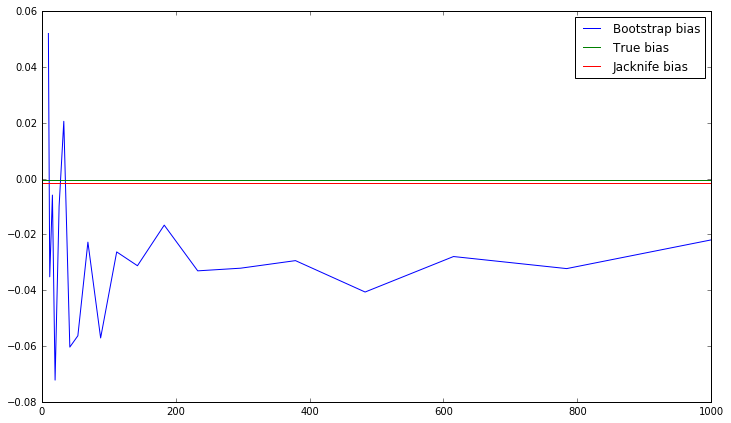

In [131]:
plot_bias_comparison_sigma(N=1000)

In [135]:
from scipy.stats import kurtosis
def plot_bias_comparison_kurtosis(N=10):
    X = expon().rvs(N)
    
    true_bias = kurtosis(X) - kurtosis(X, bias=False)
    _, jack_bias, _ = jackknife_stats(X, statistic=kurtosis)

    Bs = np.logspace(1, 3, 20).astype(int)
    boot_biases = []
    for B in Bs:
        _, boot_bias, _ = bootstrap_stats(X, statistic=kurtosis, B=B)
        boot_biases.append(boot_bias)
        
    plt.figure(figsize=(12, 7))
    plt.plot(Bs, boot_biases, label='Bootstrap bias')
    plt.axhline(true_bias, c='g', label='True bias')
    plt.axhline(jack_bias, c='r', label='Jacknife bias')
    
    plt.legend()
    plt.show()

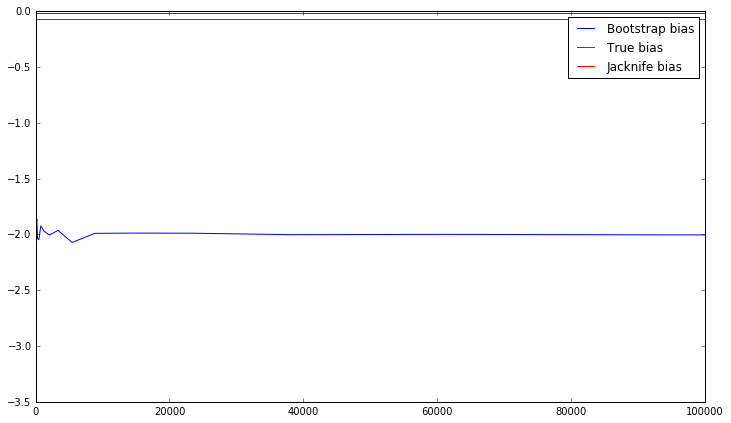

In [138]:
plot_bias_comparison_kurtosis(N=2000)

### Оценка $\theta$ для $U[0, \theta]$ и для $U\{0, \theta\}$

In [139]:
def plot_bias_comparison_sigma_uniform(N=10):
    X = np.random.uniform(0, 1, N)
    
    true_bias = np.max(X) - np.max(X) * (len(X) + 1) / len(X)

    _, jack_bias, _ = jackknife_stats(X, statistic=np.max)
    boot_biases = []

    Bs = np.logspace(1, 4, 20).astype(int)

    for B in Bs:
        _, boot_bias, _ = bootstrap_stats(X, statistic=np.max, B=B)
        boot_biases.append(boot_bias)
        
    plt.figure(figsize=(12, 7))
    plt.plot(Bs, boot_biases, label='Bootstrap bias')
    plt.axhline(true_bias, c='g', label='True bias')
    plt.axhline(jack_bias, c='r', label='Jacknife bias')
    
    plt.legend()
    plt.show()

def plot_bias_comparison_sigma_discrete(N=10, theta=100):
    X = np.random.choice(np.arange(0, int(theta)), size=N, replace=True)
    # X = np.random.choice(np.arange(0, int(theta)), size=N, replace=False)
    true_bias = np.max(X) - (np.max(X) * (len(X) + 1) / len(X))

    _, jack_bias, _ = jackknife_stats(X, statistic=np.max)
    boot_biases = []

    Bs = np.logspace(1, 4, 20).astype(int)

    for B in Bs:
        _, boot_bias, _ = bootstrap_stats(X, statistic=np.max, B=B)
        boot_biases.append(boot_bias)

    plt.figure(figsize=(12, 7))
    plt.plot(Bs, boot_biases, label='Bootstrap bias')
    plt.axhline(true_bias, c='g', label='True bias')
    plt.axhline(jack_bias, c='r', label='Jacknife bias')
    
    plt.legend()
    plt.show()

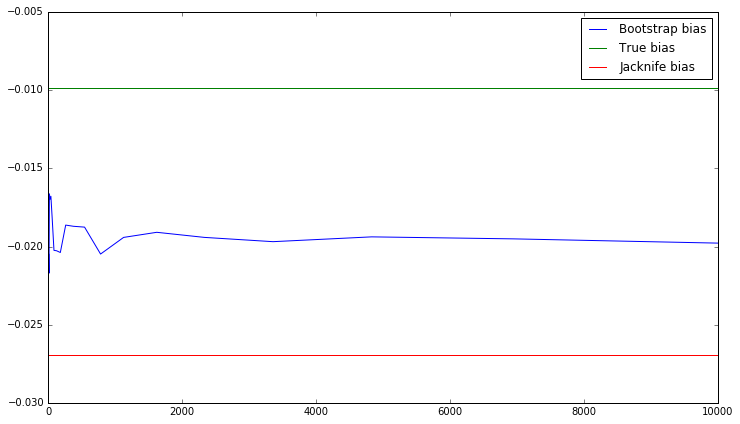

In [140]:
# запустите несколько раз
plot_bias_comparison_sigma_uniform(N=100)

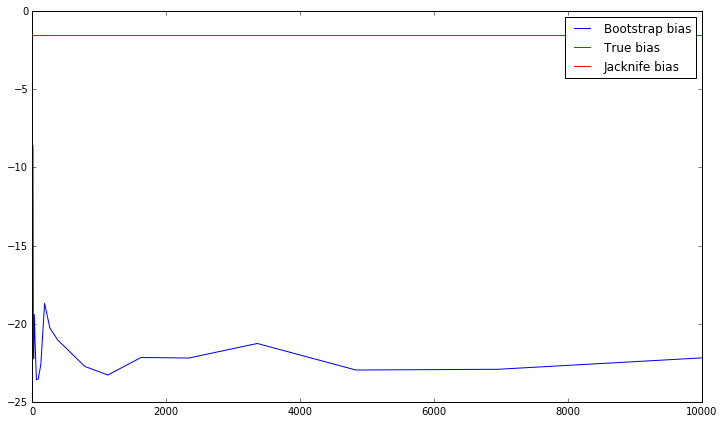

In [141]:
# запустите несколько раз
plot_bias_comparison_sigma_discrete(N=1000, theta=1500)

#### Общее наблюдение

Оценка смещения jacknife имеет более высокий порядок точности($o\left(\frac{1}{N^2}\right)$) чем бутстрепная оценка($o\left(\frac{1}{N}\right)$), что можно увидеть на примере оценки дисперсии и куртозис, поэтому имеет смысл в большинстве случаев использовать jacknife для оценки смещения.

Однако, jacknife "ломается" на негладких статистиках: медиана, максимум, к примеру. В этом случае лучше использовать обычный bootstrap.

? resampling